In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #Necesario para la estandarizacion de los datos

In [12]:
#Descaga de los datos
wine = datasets.load_wine()
nombre_columnas = np.array(wine.feature_names)
x_wine = wine.data
y_wine = wine.target

In [17]:
# Normalizacion de los valores
scaler = StandardScaler()
scaler.fit(wine.data)
x_scaled = scaler.transform(wine.data)
# x = pd.DataFrame(x_scaled, columns=nombre_columnas, ) #De esta forma trabajas con los datos estandarizados
x = pd.DataFrame(x_wine, columns=nombre_columnas, )
y = pd.DataFrame(y_wine, columns= ["Target"])
x.head(5)
# METODO MANUAL, NO RECOMENDADO
# x = pd.DataFrame(X_wines, columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
#                                     'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 
#                                     'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
x = pd.DataFrame(wine.data)
y = pd.DataFrame(wine.target)
x.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Cantidad de Centroides: 1 ---  Precision: 0.0
Cantidad de Centroides: 2 ---  Precision: 0.3694
Cantidad de Centroides: 3 ---  Precision: 0.3711
Cantidad de Centroides: 4 ---  Precision: 0.3029
Cantidad de Centroides: 5 ---  Precision: 0.3116
Cantidad de Centroides: 6 ---  Precision: 0.2909
Cantidad de Centroides: 7 ---  Precision: 0.2263
Cantidad de Centroides: 8 ---  Precision: 0.2102
Cantidad de Centroides: 9 ---  Precision: 0.182
Cantidad de Centroides: 10 ---  Precision: 0.1575


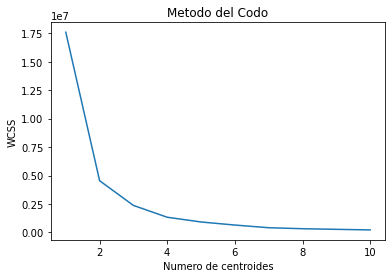

Se recomienda emplear una cantidad de 3 centroides, para asi garantizar una precision de 0.3711


In [19]:
# Elaboracion del Modelo y Metodo del Codo, este modelo prueba con hasta 10 centroides
wccs =[]
n = 1
acc = 0
for i in range(1, 11):
    codo = KMeans(n_clusters = i, max_iter = 1000, random_state = 0) # Aplicacion del metodo Kmeans
    codo.fit(x)
    y_kmeans = codo.predict(x)
    wccs.append(codo.inertia_)
    accuracy =  round(metrics.adjusted_rand_score(y_wine, y_kmeans), 4)
    print(f'Cantidad de Centroides: {i} ---  Precision: {accuracy}')
    if accuracy > acc:
        acc = accuracy
        n = i
plt.plot(range(1, 11), wccs)
plt.title('Metodo del Codo')
plt.xlabel('Numero de centroides')
plt.ylabel('WCSS')
plt.show()
print(f"Se recomienda emplear una cantidad de {n} centroides, para asi garantizar una precision de {acc}")

In [20]:
# Aplicacion del modelo utilizando el dato categorizado como "optimo"
model = KMeans(n_clusters = n, max_iter = 1000)
model.fit(x)
y_labels = model.labels_
y_kmeans = model.predict(x)
print('predicciones ', y_kmeans)
y_kmeans_df = pd.DataFrame(y_kmeans, columns = ['Prediction'])

predicciones  [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [21]:
# Accuracy
accuracy =  metrics.adjusted_rand_score(y_wine, y_kmeans)
print(round(accuracy, 5))

0.37111


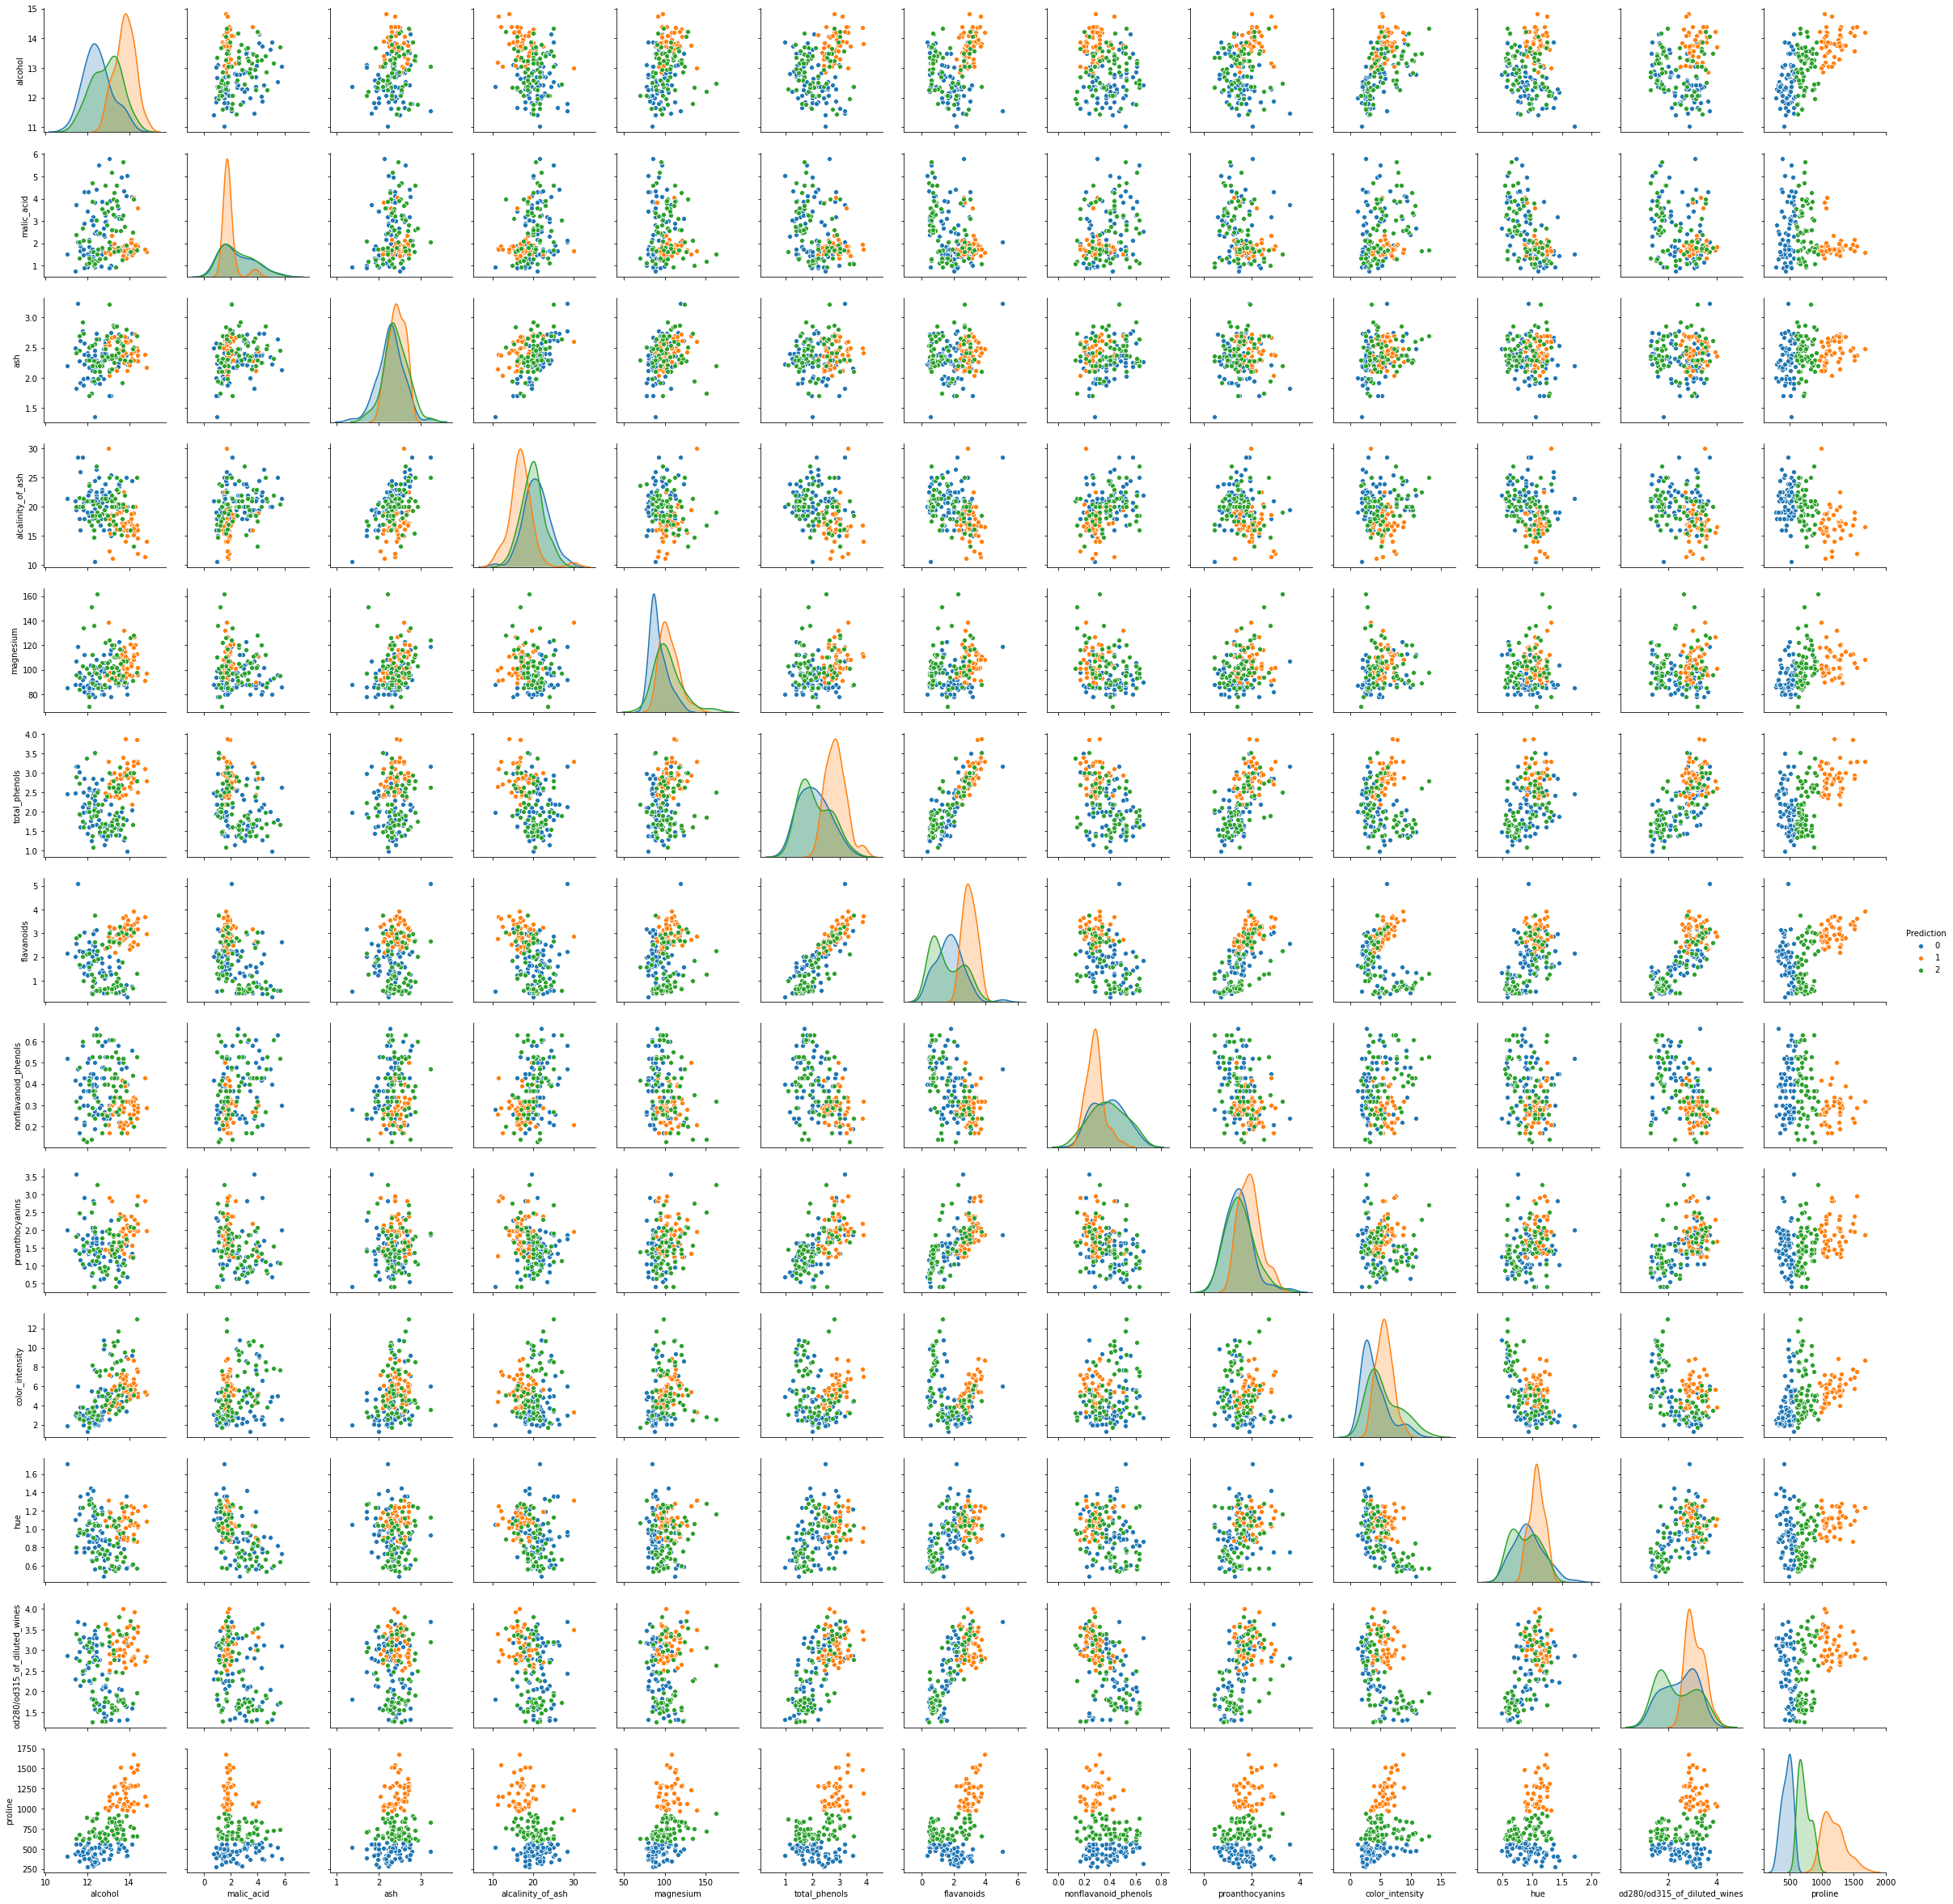

In [22]:
# Concateno el dataset de entrada con el de la prediccion
Z = pd.concat([x, y_kmeans_df], axis = 1)
# Grafico
sns.pairplot(Z, hue = 'Prediction')

# Este comando es para ver la relacion entre CADA dato clusterizado

In [23]:
# Tabla de correlacion
corr = x.corr()
corr.style.background_gradient(cmap='coolwarm')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100
